### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

### 멀티인덱스

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

#### 1) 조회

,a,b,c
v,,,
1,4,7,10
2,5,8,11


,a,b,c
v,,,
2,6,9,12


a     4
b     7
c    10
Name: (d, 1), dtype: int64

a     5
b     8
c    11
Name: (d, 2), dtype: int64

a     6
b     9
c    12
Name: (e, 2), dtype: int64

## stack() / unstack()

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html

- pivot() 메소드와 밀접하게 연관됨
- multiIndex 객체와 함께 작용하도록 설계됨
- stack() : 컬럼을 마지막 인덱스로
- unstack() : 마지막 인덱스를 컬럼으로

#### stack & unstack
- stack:컬럼 레벨에서 인덱스 레벨로 dataframe 변경
  - 즉, 데이터를 쌓아올리는 개념으로 이해하면 쉬움
- unstack : 인덱스 레벨에서 컬럼 레벨로 dataframe 변경
  - stack 의 반대 operation
- 둘은 역의 관계에 있음   

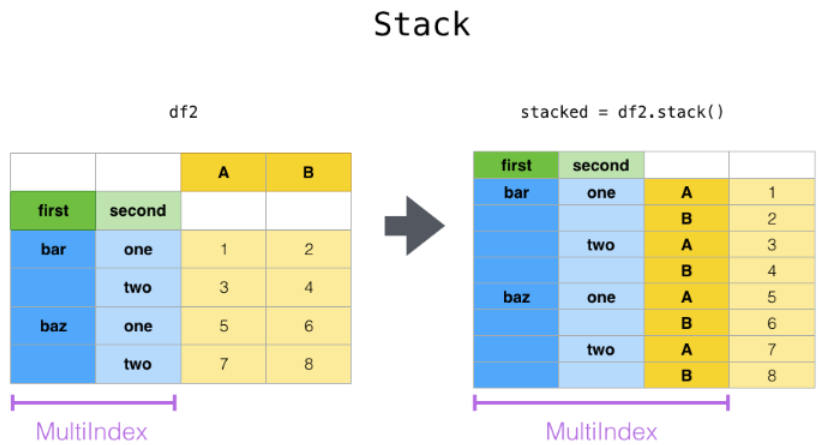

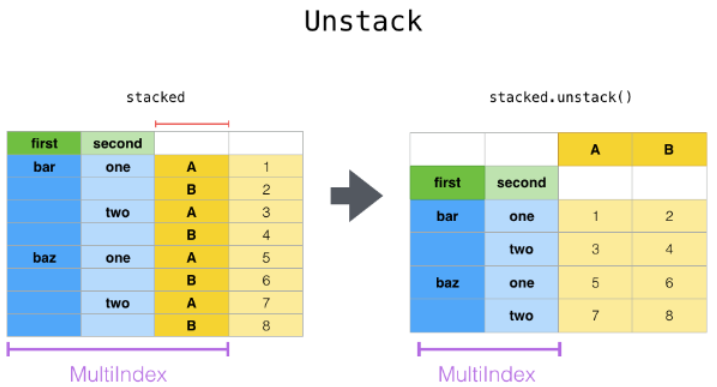

### [실습1]

A  B
first second      
bar   one     1  2
      two     3  4
baz   one     5  6
      two     7  8

#### 1) stack()

first  second   
bar    one     A    1
               B    2
       two     A    3
               B    4
baz    one     A    5
               B    6
       two     A    7
               B    8
dtype: int64

- 컬럼이 가장 안쪽에 위치하는 가장 낮은 레벨의 인덱스로 변경

pandas.core.series.Series

- 시리즈 타입으로 결과가 나옴

**stack(숫자) : 숫자가 들어올 수 있는데 멀티 컬럼일때 가능**

stack(level=-1, dropna=True) 레벨 값을 주지 않으면 가장 뒤에 있는 컬럼이 이동하는 것

#### 2) unstack()

A  B
first second      
bar   one     1  2
      two     3  4
baz   one     5  6
      two     7  8

##### unstack(인자) : 어떤 인덱스를 컬럼으로 변경할 것인지 지정 가능

first     bar  baz
second            
one    A    1    5
       B    2    6
two    A    3    7
       B    4    8

second   one  two
first            
bar   A    1    3
      B    2    4
baz   A    5    7
      B    6    8

A  B
first second      
bar   one     1  2
      two     3  4
baz   one     5  6
      two     7  8

### [실습2]

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


MultiIndex([('서울', '월요일'),
            ('서울', '화요일'),
            ('서울', '수요일'),
            ('경기', '월요일'),
            ('경기', '화요일'),
            ('부산', '월요일'),
            ('서울', '목요일'),
            ('서울', '금요일'),
            ('부산', '화요일'),
            ('경기', '수요일'),
            ('경기', '목요일'),
            ('경기', '금요일')],
           names=['지역', '요일'])

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30
서울 목요일    50    50
   금요일   100    90
부산 화요일   200    20
경기 수요일   100    80
   목요일    50    50
   금요일   100    10

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

강수량                              강수확률                        
요일    금요일   목요일     수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                 
경기  100.0  50.0   100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN     NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  1000.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
금요일  100.0    NaN   100.0  10.0   NaN  90.0
목요일   50.0    NaN    50.0  50.0   NaN  50.0
수요일  100.0    NaN  1000.0  80.0   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0  200.0    80.0  20.0  20.0  70.0

지역           경기     부산      서울
요일                            
금요일 강수량   100.0    NaN   100.0
    강수확률   10.0    NaN    90.0
목요일 강수량    50.0    NaN    50.0
    강수확률   50.0    NaN    50.0
수요일 강수량   100.0    NaN  1000.0
    강수확률   80.0    NaN    90.0
월요일 강수량   200.0  100.0   100.0
    강수확률   10.0   30.0    80.0
화요일 강수량   200.0  200.0    80.0
    강수확률   20.0   20.0    70.0

강수량  강수확률
요일  지역              
금요일 경기   100.0  10.0
    서울   100.0  90.0
목요일 경기    50.0  50.0
    서울    50.0  50.0
수요일 경기   100.0  80.0
    서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    부산   200.0  20.0
    서울    80.0  70.0

### [참고] melt 와 stack

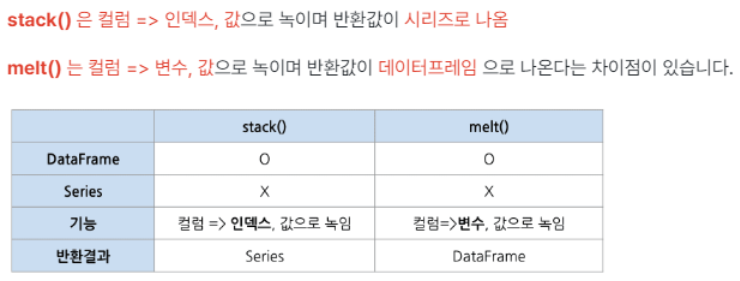